### These are my solutions to the Tasks assessments.  Rebecca Turley (G00376344@gmit.ie) 
***

### Task 1: 
***
##### October 5th, 2020: Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should  research the task first and include references and a description of your algorithm. 

First, let's create a plot of what the square root should look like and see if it gives an idea as to what the square root of 2 is. Below are 1000 numbers evenly spaced out between 0 and 10.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.0, 10, 1000)
x

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

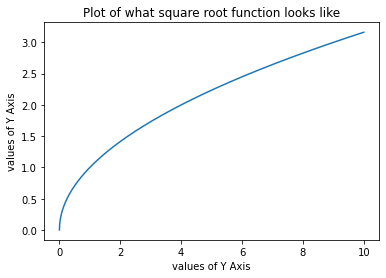

In [2]:
plt.title("Plot of what square root function looks like")
plt.xlabel('values of Y Axis')
plt.ylabel('values of Y Axis')
y = np.sqrt(x)
plt.plot(x,y)
plt.show()


The above is what the square root function looks like.  It is a little small but looking at the 2 on the bottom of the graph (x axis) it aligns up along the y axis to a little under 1.5.  Therefore, we can say that we expect the square root of 2 to be slightly less than 1.5

I have decided to look into using the Newton-Raphson method to try and solve the task.  It is based on the idea of linear approximation to produce successively better approximations to the roots. [1] 


$$ x_{1} = x_{0} - \frac{f( x_{0})} {f^1( x_{0})} $$



The square root of a number is the number which when multiplied by itself results in the initial number chosen. e.g. 3 is the square root of 9 as 3*3=9.  

There are three parts to the process. 
1. Guess 
2. Divide 
3. Average. 

Then parts two and three are repeated in a loop.  

Begin by making an attempt to guess the square root of a number.  Obviously, a good guess is better than a bad one but regardless, the method will work. If the initial guess is a good one it will shorten the iteration process. 

e.g. In trying to get the square root of 10 my guess is 2.  

Next part is to divide, so divide 10 by 2 and the result is 5. 

Third part is to average 5 and 2 = 7 / 2 = 3.5.  

Now repeat second part with new guess of 3.5 so 10 /3.5 =2.85.  Average of 3.5 + 2.85 = 3.175.  

Repeat second part; 10 / 3.175 = 3.149. 

Average of 3.175 + 3.149 = 3.162. 

This could continue, getting a nearer approximation with each iteration. 

To see how close I am with 3.162 multiply it by itself to square it. 3.162 * 3.162 = 9.998. 
Initial number was 10.

In [3]:
# [2] Code from https://stackoverflow.com/questions/59844613/sqrt-using-any-method-f-e-newton-but-with-fixed-number-of-digits-after-separa
import decimal

def square_root(num, P):
    # need to set the decimal precision to more than enough digits to handle the full calculation
    # (the number of decimal places, plus the number of digits in the original number, 
    # should be enough - this counts the numbers both before and after the decimal point)
    # I add +2 to give some room to spare, as well
    decimal.getcontext().prec = P + len(str(num)) + 2
    # now, do the algorithm you have, except with everything as fixed-point Decimal objects
    x = decimal.Decimal(num)
    y = decimal.Decimal(1)
    e = decimal.Decimal(10) ** decimal.Decimal(-P)
    # important: I changed this to >= so that it runs when P=0.
    # Otherwise we output 2 when P=0, when we should output 1.
    while (x - y >= e):
        x = (x + y) / 2
        y = num / x
    # now, truncate to exactly the desired number of digits
    # this is straightforward - we can just use the built-in `round()` method with P
    # we subtract e/2 to simulate always rounding down, since round() simply rounds to closest.
    return round(x - (e / 2), P)

square_root(2, 0)
print (square_root(2, 100))


# In the decimal example above, I allowed it to use enough memory to be accurate to about 100 decimal places so there is no long string of zeroes half way through. 
#If decimal were to be imported, it would make the task a lot easier.  Unfortunately, it isn't the case so the search continues.

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [4]:
import math
math.sqrt(2)
format(math.sqrt(2), '.100f')


'1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000'

Here I tried to calculate to 100 places but as can be seen from the output above, all the figures from approximately half way through the requested number of places resolve into zeros.<br>
This is due to a limitation in floating point arithmetic errors where decimal values stored as a formula and as such does not have an exact representation.<br>
The math prints out a number that is close to 53 digits before becoming all zeroes because the floating point math is (very basically) defined as some numerator divided by 2****53**.
<br>Where by the number has "precision" of approximately 50ish decimal digits, but it's not accurate to that many digits because the numerator itself has too few digits (less than 64-bits worth, an actual 100-digit decimal number would require hundreds of bits to store).  It is showing all the possible decimal digits of the number that is closest to the actual square-root of 70 when represented as a 64-bit binary floating point value. It is discussed in the python documents. [3]

In [5]:
# [4] https://stackoverflow.com/questions/46183020/square-root-without-pre-defined-function-in-python

def sqrt2(n):
    """
    A function to calculate the square root of a number x.
    """
    x=n
    y=1.000000 #iteration initialisation.
    e=0.000001 #accuracy after decimal place.
    # Loop until we are happy with the accuracy. While the difference between x and y is greater than 0.000001
    while x-y > e:
        # Calculate x and y through each iteration of the loop until the difference between x and y reaches the value of e.
        x=(x+y)/2
        y=n/x
    # Return approximate square root of x.
    return (x)

n = 2

print (sqrt2(2))

s = sqrt2(n)



# [5] https://www.geeksforgeeks.org/precision-handling-python/
# [6] https://mkaz.blog/code/python-string-format-cookbook/  
# [7]http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html
# Prints square root to 100 decimal places
a = format(s, ".100f")


print (a)




1.4142135623746899
1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000


The first result above is the result of a calculation of the square root of 2 without importing any additional libraries but only does so to 16 places.  This is due to limitation within Python's floating point arithmetic. [3] and the 16th place may be inaccurate. [8] https://www.programiz.com/python-programming/numbers

The second result does not solve the task as it results in the last half of the result just being made up of 0's.  This is the result of format being used and the limit of floating-point precision which only displays more digits but that doesn't make the underlying value more precise.   The internal representation of floating point numbers relies on a fixed number of binary digits to represent a decimal number.  Some decimal numbers can't be represented exactly in binary, resulting in small roundoff errors. http://effbot.org/pyfaq/why-are-floating-point-calculations-so-inaccurate.htm

In [6]:
#Working on the function sqrt2(n) from earlier. # [3] 
def sqrt2(n):
    x=n
    y=1.000000 #iteration initialisation.
    e=0.000001 #accuracy after decimal place.
    while x-y > e:
        x=(x+y)/2
        y=n/x
    return (x)

n = 2

#print (sqrt2(2))


print (sqrt2(2))

s = sqrt2(n)

a = format(s, ".0f")
print (a)

# body of the main function
def main():
    

    # d is the number of which the square root is to be calculated in this example it is 2
    # [10] https://www.tutorialspoint.com/How-to-perform-square-root-without-using-math-module-in-Python
    #Python has exponentiation operator (**) which can be used to calculate power of a number. x**y returns x raised to y i.e. y times multiplication of x. Since we need to calculate square root, y should be (1/2)
    sqrt  = 100 ** 200
    d =  2 * sqrt
    
    # [11] https://www.geeksforgeeks.org/convert-integer-to-string-in-python/
    # convert result of above to string
    #allstring = str(sqrt2(d)) - alternative method
    allstring = "% a" % (sqrt2(d))


    # [12] https://stackoverflow.com/questions/53976250/how-to-add-dot-separator-on-different-positions-of-a-number-in-python    
    # position the decimal place after the first digit
    result = allstring[0:1] + "."
        
    # [13] https://docs.python.org/2.3/whatsnew/section-slices.html
    # slice off the first 100 off the string
    for i in allstring[1:100]:
        result = result + i
    
 
    print(result)
                

        
# execute only if run as a script
if __name__ == '__main__':
    main()    

1.4142135623746899
1


OverflowError: int too large to convert to float

After reading the documentation at [3]  it suggested "For more pleasant output, you may wish to use string formatting to produce a limited number of significant digits" so that is what I attempted to do here.  However, the above code results in an OverflowError as it states the integer is too large to convert to float.  This happens regardless of whether I ask it to calculate it to just one digit, ignoring the decimal places altogether.  I had thought converting it to a string might solve the problem but it didn't seem to accept the output from the sqrt2 function.  I think the output may have too many numbers in it or is not able to display due to memory limitations so I search for a function which not cause the same overflow error.  

In [7]:
# [14] Code adapted from https://stackoverflow.com/questions/15390807/integer-square-root-in-python
def sqrt2(n):
    # N is the number of which the square root is to be calculated.  Take whats on the right of the equals and save it inside whats on the left.
    x = n
    # Y is equal to the initial n number entered, add one and divide by two disregarding remainder and rounding down to the nearest integer
    y = (x + 1) // 2 
    # Loop as long as y (original n entered plus one diveded by 2) is less than original n
    while y < x:
        x = y
        y = (x + n // x) // 2  # 
    return x # returns the largest integer x for which x * x does not exceed n.

#print(sqrt2(2))


# body of the main function
def main():
    

    # d is the number of which the square root is to be calculated in this example it is 2
    # [9] https://www.tutorialspoint.com/How-to-perform-square-root-without-using-math-module-in-Python
    #Python has exponentiation operator (**) which can be used to calculate power of a number. x**y returns x raised to y i.e. y times multiplication of x. Since we need to calculate square root, y should be (1/2)
    sqrt  = 100 ** 200
    d =  2 * sqrt
    
    # [10] https://www.geeksforgeeks.org/convert-integer-to-string-in-python/
    # convert result of above to string
    #allstring = str(sqrt2(d)) - alternative method
    allstring = "% s" % (sqrt2(d))


    # [11] https://stackoverflow.com/questions/53976250/how-to-add-dot-separator-on-different-positions-of-a-number-in-python    
    # position the decimal place after the first digit
    result = allstring[0:1] + "."
        
    # [12] https://docs.python.org/2.3/whatsnew/section-slices.html
    # slice off the first 100 off the string
    for i in allstring[1:100]:
        result = result + i
    
 
    print(result)
                

        
# execute only if run as a script
if __name__ == '__main__':
    main()    


1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


## End Result

As per Robert Nemiroff (George Mason University and NASA Goddard Space Flight Center)
and checked by Jerry Bonnell (University Space Research Association and NASA
Goddard Space Flight Center), the first 100 digits of the square root of 2 is   **1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273**       [15]  https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil



#### My results:

decimal (square_root(2, 100)) =  **1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727**

math.sqrt(2) = **1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000**

sqrt2(n)(without importing additional libraries) = **1.4142135623746899**

string conversion sqrt2(n) = **1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572**

After going through this task, I realised that depending on the level of accuracy required from the output, different results and calculation methods are permissible.  With the decimal calculation at the start, I asked it to calculate it to 100 places and it printed them.  With the math.sqrt it calculated but only to approximately 53 places.  The sqrt2(n)(without importing additional libraries) did so to its default maximum number of places of 16.  The only way around it I could find was to convert the output to a string and then cut off the number of decimal places I want.  The number is identical to the number calculated by NASA.

For most day to day functions and calculations, the shorter numbers would be satisfactory but I can imagine where in the likes of cryptography, precision would be of the utmost importance.  On a side note, none of the calculations above take into account computation time. 

#### While trying to understand and research the task I used the following references.  Where applicable, I have referenced in the relivant sections.  The others I have read and watched in the course of my investigations. 

[1] Wikipedia, (2020), Newton's method: https://en.wikipedia.org/wiki/Newton%27s_method, accessed October 2020.<br>
[2] Green Cloak Guy, (2020), stackoverflow.com, SQRT using any method (f.e. Newton) but with fixed number of digits after separatorCode from https://stackoverflow.com/questions/59844613/sqrt-using-any-method-f-e-newton-but-with-fixed-number-of-digits-after-separa, accessed October 2020.<br>
[3] Python Software Foundation, (2020), Floating Point Arithmetic: Issues and Limitations, https://docs.python.org/3/tutorial/floatingpoint.html, accessed October 2020.<br>
[4] Deepanshu Kapoor, (2017), stackoverflow.com, Square root without pre-defined function in python  https://stackoverflow.com/questions/46183020/square-root-without-pre-defined-function-in-python, accessed 2020.<br>
[5] GeeksforGeeks, (2017), Precision Handling in Python https://www.geeksforgeeks.org/precision-handling-python/, accessed October 2020.<br>
[6] Marcus Kazmierczak, (2020), Python String Format Cookbook https://mkaz.blog/code/python-string-format-cookbook/, accessed October 2020.<br> 
[7] Dr. Andrew N. Harrington,(2020), Decimals, Floats, and Floating Point Arithmetic,  http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html, accessed Octoner 2020.<br>
[8] Programwiz, Python Numbers, Type Conversion and Mathematics, https://www.programiz.com/python-programming/numbers, accessed October 2020.<br>
[9] effbot.org, Why are floating point calculations so inaccurate?, http://effbot.org/pyfaq/why-are-floating-point-calculations-so-inaccurate.html accessed October 2020.<br>
[10] Jayashree,(2018), tutorialspoint.com, https://www.tutorialspoint.com/How-to-perform-square-root-without-using-math-module-in-Python, accessed October 2020.<br>
[11] RajuKumar19, (2020), Convert integer to string in Python, https://www.geeksforgeeks.org/convert-integer-to-string-in-python/, accessed October 2020.<br>
[12] Sweeper, (2018), stackoverflow.com, How to add dot separator on different positions of a number in Python?, https://stackoverflow.com/questions/53976250/how-to-add-dot-separator-on-different-positions-of-a-number-in-python, accessed October 2020.<br>
[13] docs.python.org, Extended Slices, https://docs.python.org/2.3/whatsnew/section-slices.html, accessed October 2020.<br>
[14] user448810, (2013), stackoverflow.com, Integer square root in python, Code adapted from https://stackoverflow.com/questions/15390807/integer-square-root-in-python, accessed October 2020.<br>
[15] Robert Nemiroff, (1994), square root of 2 to one million places, https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil accessed October 2020.<br>



* mtu.edu, Computing Square Roots with Newton's Method, https://pages.mtu.edu/~shene/COURSES/cs201/NOTES/chap06/sqrt-1.html#:~:text=We%20have%20discussed%20Newton's%20Method,root%20of%20a%20positive%20number.&text=Newton's%20method%20suggests%20that%20a,successive%20guesses%20are%20very%20close., accessed October 2020. <br>

* Ariel Gershon, Edwin Yung, and Jimin Khim , Newton Raphson Method, brillant.org, https://brilliant.org/wiki/newton-raphson-method/#:~:text=The%20Newton%2DRaphson%20method%20(also,straight%20line%20tangent%20to%20it., accessed October 2020.<br>

* David Dobervich, (2016), Newton's Method in Python, youtube.com, https://www.youtube.com/watch?v=2GrfaB88w4M&ab_channel=DavidDobervich, accessed October 2020.<br>

* ExamSolutions, (2012), How to use the Newton Raphson method, youtube.com, https://www.youtube.com/watch?v=PIPiv6gn_Ls&ab_channel=ExamSolutions, accessed October 2020.<br>

* vkedco, (2011), Python Primer: Implementing Newton's Square Root Approximation, youtube.com, https://www.youtube.com/watch?v=nDlip0Mg8tE&ab_channel=vkedco, accessed October 2020.<br>

* Py Point, (2020), how to find square root in python without math||how to find square root in python, youtube.com, https://www.youtube.com/watch?v=6red7dqIY-c&ab_channel=PyPoint, accessed October 2020.<br>
